<a href="https://www.kaggle.com/code/filipkin/starter?scriptVersionId=202693111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import warnings
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv")

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [5]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [6]:
df.shape

(3482, 30)

In [7]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [8]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href"], axis = 1, inplace = True)

In [9]:
columns_to_clean = ["deposit","room_num","offer_ID","area","total_floor","floor","net_price","year_built"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [10]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [11]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,offer_ID,add_cost
0,Włochy,2100,2100,37,2,NaN,,4,NaN,Okna:plastikowe,NaN,NaN,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,61451923,NaN
1,Mokotów,1825,3400,38,2,Rodzaj zabudowy:blok,,NaN,Materiał budynku:pustak,Okna:plastikowe,Ogrzewanie:miejskie,2020,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,61405987,Czynsz - dodatkowo:350 zł
2,Bielany,3300,3300,57,3,Rodzaj zabudowy:blok,,15,Materiał budynku:wielka płyta,Okna:drewniane,Ogrzewanie:miejskie,1984,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,61375474,Czynsz - dodatkowo:1 zł
3,Targówek,2200,NaN,63,2,Rodzaj zabudowy:blok,4,5,Materiał budynku:cegła,Okna:drewniane,Ogrzewanie:miejskie,2005,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,61439492,NaN
4,Ochota,3000,3000,65,3,Rodzaj zabudowy:kamienica,3,4,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,1938,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,61455072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,Rodzaj zabudowy:apartamentowiec,3,7,NaN,NaN,NaN,NaN,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,61536131,Czynsz - dodatkowo:350 zł
3478,Wilanów,3300,3000,50,2,Rodzaj zabudowy:blok,1,2,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,2006,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,61535357,NaN
3479,Praga-Południe,2500,2500,4666,2,Rodzaj zabudowy:apartamentowiec,5,5,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,2015,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,61535028,NaN
3480,Praga-Północ,1300,1700,23,1,Rodzaj zabudowy:kamienica,,4,Materiał budynku:cegła,Okna:drewniane,Ogrzewanie:kotłownia,1938,Stan wykończenia:do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,61535800,Czynsz - dodatkowo:270 zł


<Axes: >

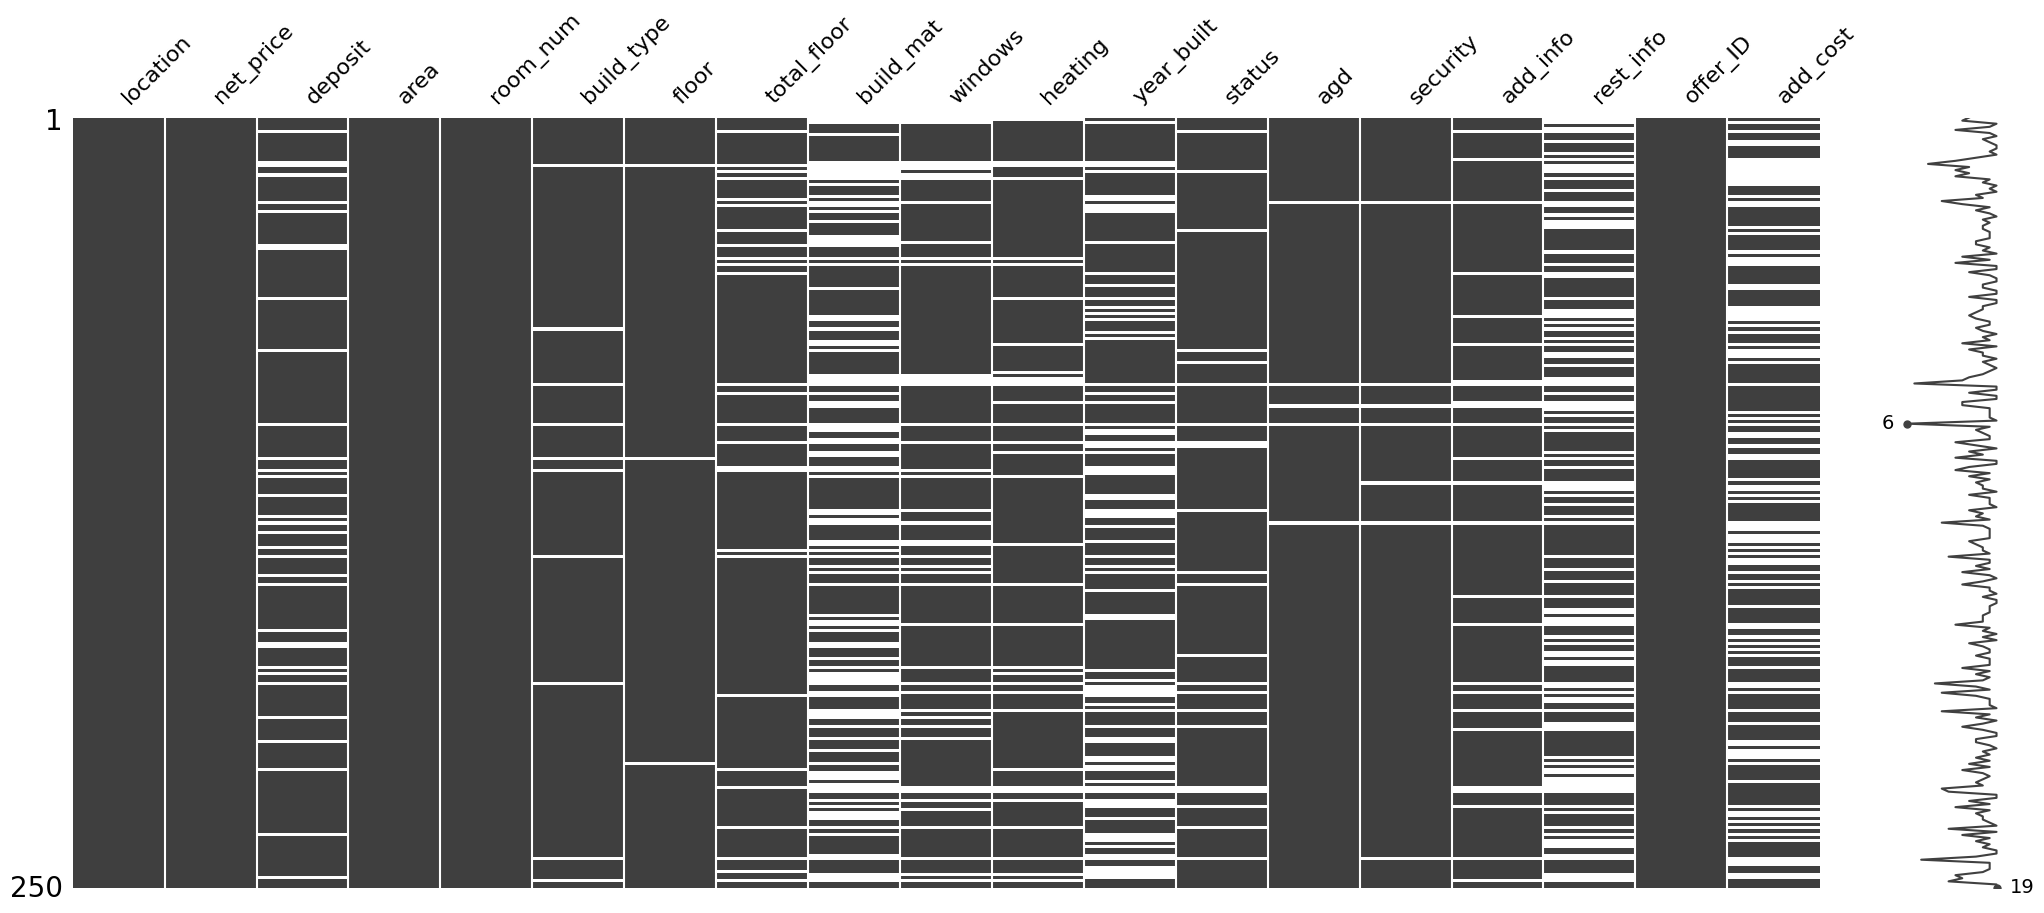

In [12]:
%matplotlib inline
msno.matrix(df.sample(250))

<Axes: >

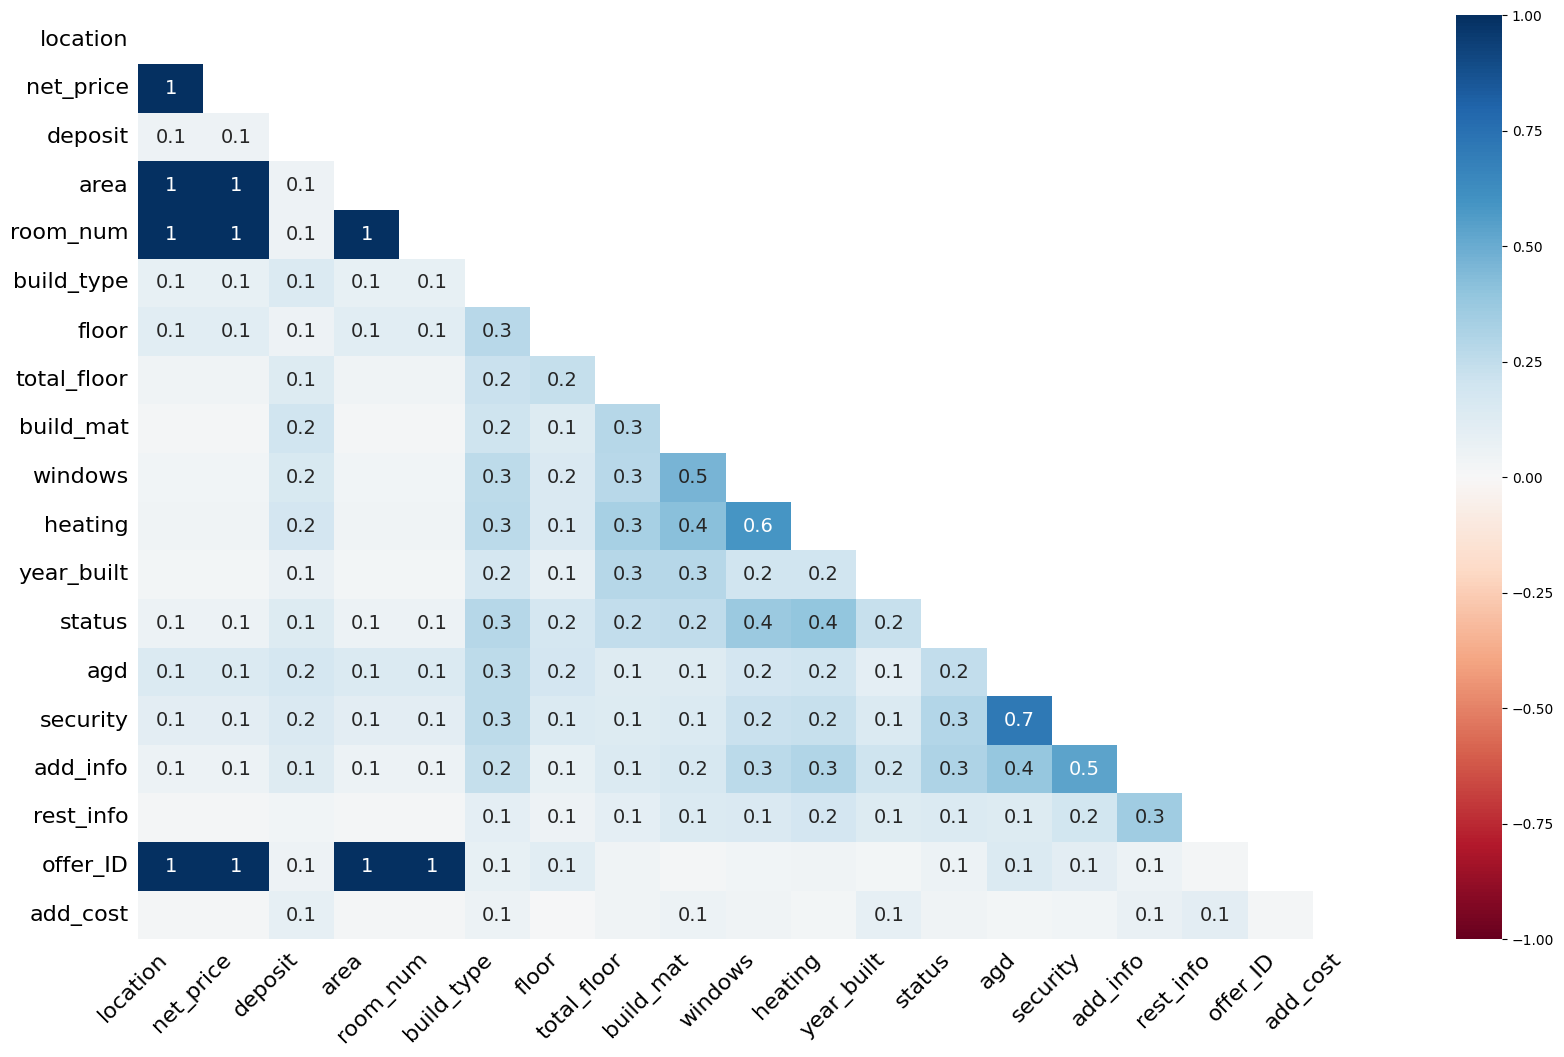

In [13]:
msno.heatmap(df)